## FIZ437E HOMEWORK 3 

1) MNIST classification with SVM and MLP.

2) Colored MNIST (4 channels) classification, SVM vs MLP

- Use cross entropy loss and plot the bias-variance tradeoff.

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import tensorflow as tf
import keras
from keras.models import load_model
from keras.utils import np_utils
from keras.layers import Dense, Activation
from keras.models import Sequential, Model
from tensorflow import keras
np.random.seed(42)

print("We're using TF", tf.__version__)
print("We are using Keras", keras.__version__)

We're using TF 2.7.0
We are using Keras 2.7.0


In [2]:
def load_dataset(flatten=False):
    """Verisetini keras kullanarak yüklüyoruz."""
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
    # normalize x
    X_train = X_train.astype(float)#/255.
    X_test = X_test.astype(float)#/255.
    
    return X_train, y_train, X_test, y_test

def colored_mnist(features):
    """ Bir boyutlu np.array objesini üstüste stackleyerek 3 boyutlu hale getiriyor.
    Kırmızı, yeşil, mavi ve sarı renkleri elde etmek için 0'lardan oluşan features ile aynı
    boyutta bir arrayı kullanıyor. 0'lardan oluşan array kendi başına siyahtır.
    Bu fonksiyon elimizdeki arrayı sıralı bir şekilde 4'e bölerek sırasıyla RGBY renklerini atıyor, 
    bu yüzden renklerin dağılımları eşit olmayabilir."""

    colored = [0,0,0,0]
    for color in range(4):
        number_i_splitted = np.array_split(features, 4)
        shape = number_i_splitted[color].shape[0]
        dim = np.zeros((shape, 28, 28))
        if color == 0:
            colored[color] = np.stack((number_i_splitted[color].reshape(shape, 28, 28), dim, dim), axis = 3)
            len(colored)
        if color == 1:
            colored[color] = np.stack((dim, number_i_splitted[color].reshape(shape, 28, 28), dim), axis = 3)
        if color == 2:
            colored[color] = np.stack((dim, dim, number_i_splitted[color].reshape(shape, 28, 28)), axis = 3)
        if color == 3:
            colored[color] = np.stack((number_i_splitted[color].reshape(shape, 28, 28), number_i_splitted[color].reshape(shape, 28, 28), dim), axis = 3)

    colored_features = np.concatenate((colored[0], colored[1], colored[2], colored[3]))
    return colored_features
        
def from_1d_to_3d(data):
    """Orijinal MNIST verisetini 3 boyutlu hale getirir, sadece grayscale değerlerden oluşur"""
    
    data_3d = np.stack((data.reshape(data.shape[0], 28, 28), data.reshape(data.shape[0], 28, 28), data.reshape(data.shape[0], 28, 28)), axis = 3)
    return data_3d 

def flatten_digits(array):
    """"""
    flat_array = array.reshape((array.shape[0]), -1)
    return flat_array

def plot_samples(data, title="TITLE"):
    """20 örnek rakamı çizdirir"""
    
    num_row = 2
    num_col = 5# plot images
    num = 20
    fig, axes = plt.subplots(4, num_col, figsize=(2.5*num_col,3.2*num_row))
    for i in range(20):
        images = data[15000*(i%4):(15000)*(i%4)+num]
        labels = y_train[15000*(i%4):(15000)*(i%4)+num]
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i]/255, interpolation='none')
        ax.set_title('Label: {}'.format(labels[i]))
        ax.axis("off")
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()
    
def model_history(X, y, x_test, y_test, file_name = "myModel.h5"):
    """Multi Layer Perceptron with three layers, saves trained model and returns training history."""
    
    s = tf.keras.backend.clear_session()
    epoch_size = 10
    
    model = Sequential()  
    model.add(Dense(256, input_shape=(2352,))) 
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    optimizer = keras.optimizers.Adagrad()
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )

    
    import keras_utils 
    hist = model.fit(
        X, 
        y,
        batch_size=64,
        epochs=epoch_size,
        validation_data = (x_test, y_test),
        shuffle=True,
        verbose=0
    )
    model.save(file_name)
    
    return hist

def loss(model, X, y, verbose = 0):
    """Returns categorical cross entropy loss"""
    
    return model.evaluate(X, y, verbose)

def plot_history_loss_and_acc(history_keras_nn):
    """Plots training history."""
    
    fig, axs = plt.subplots(1,2, figsize=(12,4))

    axs[0].plot(history_keras_nn[0].history['loss'])
    axs[0].plot(history_keras_nn[0].history['val_loss'])
    axs[0].set_title('Cross Entropy Loss for Original Data')
    axs[0].set_ylabel('loss')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'validation'], loc='upper right')

    axs[1].plot(history_keras_nn[1].history['loss'])
    axs[1].plot(history_keras_nn[1].history['val_loss'])
    axs[1].set_title('Cross Entropy Loss for Colored Data')
    axs[1].set_ylabel('accuracy')
    axs[1].set_xlabel('epoch')
    axs[1].legend(['train', 'validation'], loc='upper right')

    plt.show()

In [3]:
X_train, y_train, X_test, y_test = load_dataset()

colored_train = colored_mnist(X_train)
colored_test = colored_mnist(X_test)
X_train_3d = from_1d_to_3d(X_train)
X_test_3d = from_1d_to_3d(X_test)
print("3 channel X_train shape: ",X_train_3d.shape)
print("3 channel X_test_3d shape: ", X_test_3d.shape)
print("Colored X_train shape: ", colored_train.shape)
print("Colored X_test shape: ", colored_test.shape)

3 channel X_train shape:  (60000, 28, 28, 3)
3 channel X_test_3d shape:  (10000, 28, 28, 3)
Colored X_train shape:  (60000, 28, 28, 3)
Colored X_test shape:  (10000, 28, 28, 3)


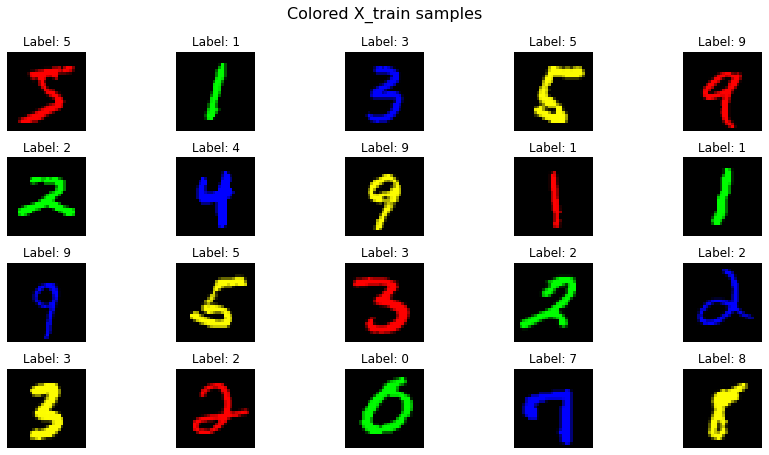

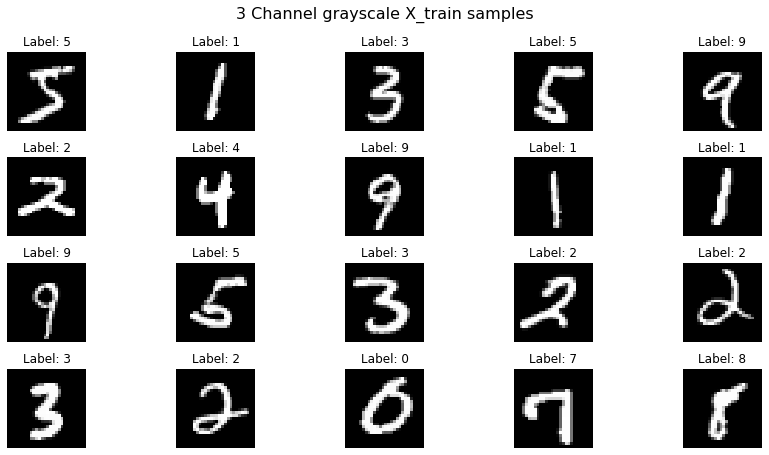

In [4]:
plot_samples(colored_train, "Colored X_train samples")
plot_samples(X_train_3d, "3 Channel grayscale X_train samples")

In [5]:
# flatten images
X_train_flat = flatten_digits(X_train)
print("X_train_flat shape: ",X_train_flat.shape)

X_test_flat = flatten_digits(X_test)
print("X_test flat shape: ",X_test_flat.shape)

X_train_3d_flat = flatten_digits(X_train_3d)
print("X_train_3d_flat shape: ", X_train_3d_flat.shape)

X_test_3d_flat = flatten_digits(X_test_3d)
print("X_train_3d_flat shape: ", X_test_3d_flat.shape)

colored_train_flat = flatten_digits(colored_train)
print("colored_train flat shape: ",colored_train_flat.shape)

colored_test_flat = flatten_digits(colored_test)
print("colored_test flat shape: ",colored_test_flat.shape)

# one-hot encode the target
y_train_oh = np_utils.to_categorical(y_train, 10)
y_test_oh = np_utils.to_categorical(y_test, 10)
print("One-hot-encoded target shape: ", y_train_oh.shape)

X_train_flat shape:  (60000, 784)
X_test flat shape:  (10000, 784)
X_train_3d_flat shape:  (60000, 2352)
X_train_3d_flat shape:  (10000, 2352)
colored_train flat shape:  (60000, 2352)
colored_test flat shape:  (10000, 2352)
One-hot-encoded target shape:  (60000, 10)


Training model with original MNIST and colored MNIST respectively.

In [6]:
hist_X_train = model_history(X_train_3d_flat, y_train_oh, X_test_3d_flat, y_test_oh, "X_train_flat_model.h5")
X_train_flat_model = load_model("models/X_train_flat_model.h5")

hist_colored = model_history(colored_train_flat, y_train_oh, colored_test_flat, y_test_oh, "colored_train_flat_model.h5")
colored_train_flat_model = load_model("models/colored_train_flat_model.h5")

In [7]:
d = {'train_loss':       [loss(colored_train_flat_model, colored_train_flat, y_train_oh)[0],
                          loss(X_train_flat_model, X_train_3d_flat, y_train_oh)[0]], 
     
    'original_val_loss': [loss(colored_train_flat_model, X_test_3d_flat, y_test_oh)[0],
                          loss(X_train_flat_model, X_test_3d_flat, y_test_oh)[0]],
     
    'colored_val_loss':  [loss(colored_train_flat_model, colored_test_flat, y_test_oh)[0],
                          loss(X_train_flat_model, colored_test_flat, y_test_oh)[0]],
    'original_val_accuracy': [loss(colored_train_flat_model, X_test_3d_flat, y_test_oh)[1],
                              loss(X_train_flat_model, X_test_3d_flat, y_test_oh)[1]],
    'colored_val_accuracy': [loss(colored_train_flat_model, colored_test_flat, y_test_oh)[1],
                              loss(X_train_flat_model, colored_test_flat, y_test_oh)[1]]}


313/313 [==============================] - 0s 1ms/step - loss: 11.7133 - accuracy: 0.4415


In [8]:
pd.DataFrame(d, index = ["Colored_model", "Original_model"])

,train_loss,original_val_loss,colored_val_loss,original_val_accuracy,colored_val_accuracy
Colored_model,0.125525,2.965406,1.012008,0.8383,0.9039
Original_model,0.092048,0.823032,11.713254,0.9409,0.4415


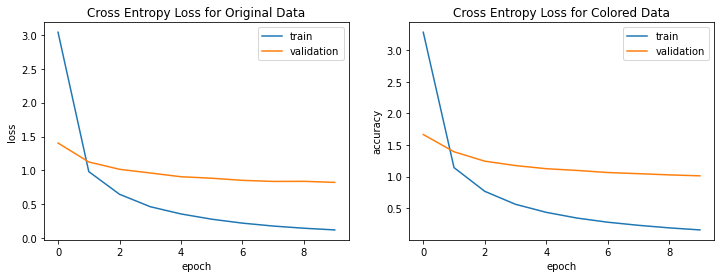

In [10]:
histories = [hist_X_train, hist_colored]
plot_history_loss_and_acc(histories)